20240628_041200.WAV


/var/folders/h2/933xpyn94hj1ff1zb7v1vw3c0000gp/T/ipykernel_1110/805486842.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(file_path)


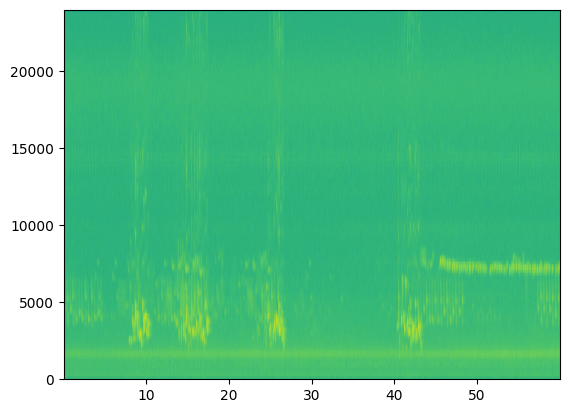

20240705_042300.WAV


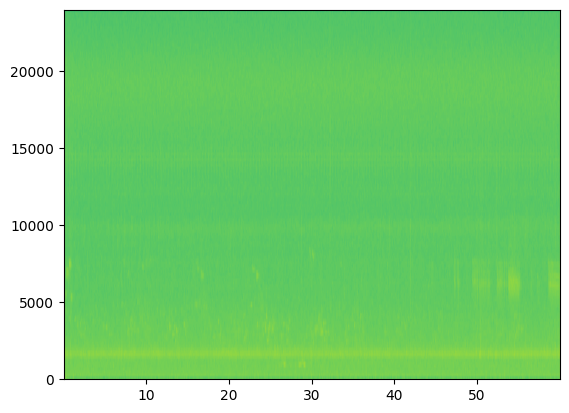

20240701_184500.WAV


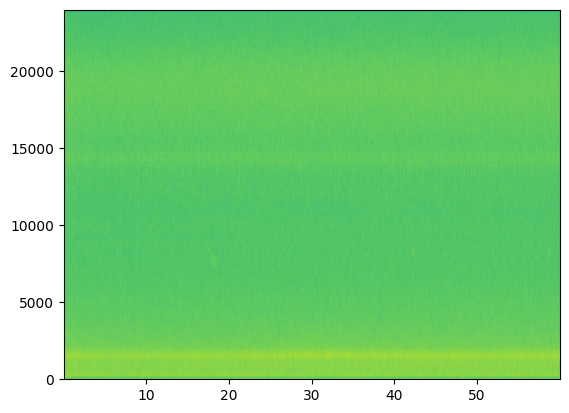

20240626_042300.WAV


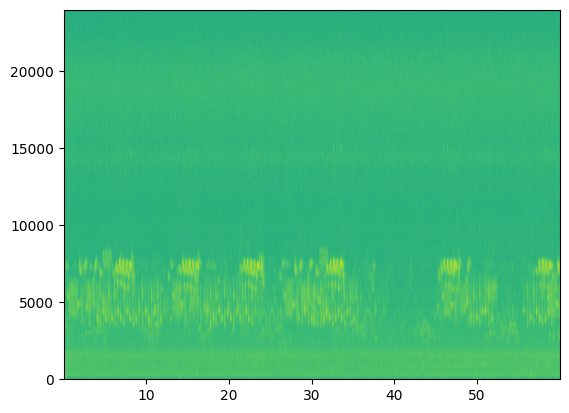

20240625_205200.WAV


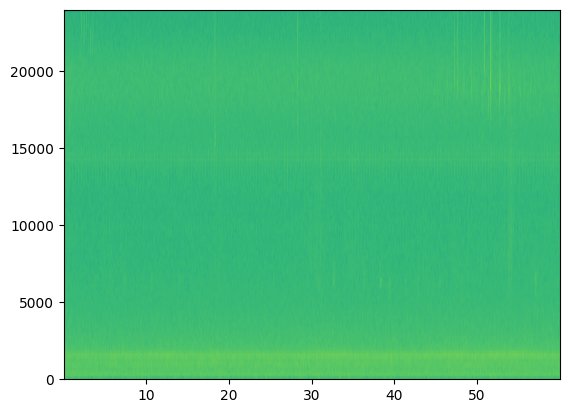

20240705_191400.WAV


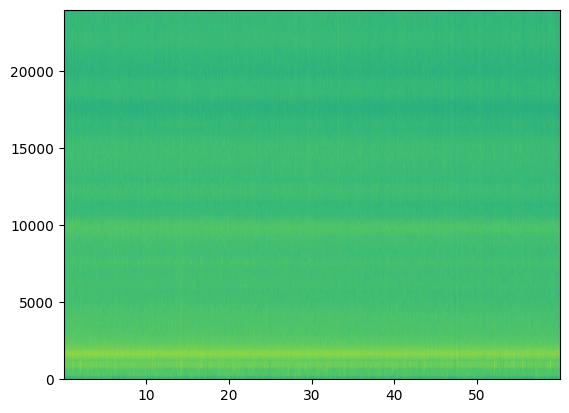

KeyboardInterrupt: 

In [5]:
#!pip install matplotlib numpy scipy

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Create output directory if it doesn't exist
output_dir = '../data/spectrograms/1'
os.makedirs(output_dir, exist_ok=True)

# Function to generate and save spectrogram
def generate_spectrogram(file_path, output_dir):
    sample_rate, samples = wavfile.read(file_path)
    spectrogram, frequencies, times, image = plt.specgram(samples, Fs=sample_rate)
    plt.show()
    return spectrogram, frequencies, times
    
    
# Process each .wav file in the input directory
input_dir = '../data/pilot01_data/1'
for file_name in os.listdir(input_dir):
    #print(file_name)
    if file_name.endswith('.WAV'):
        print(file_name)
        file_path = os.path.join(input_dir, file_name)
        spectrogram, frequencies, times = generate_spectrogram(file_path, output_dir)
        np.save(os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.npy"), spectrogram)
        